In [1]:
import numpy as np
import pandas as pd
import csv
import datetime as dtt
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter 

In [2]:
file = pd.read_csv("crime_data_log.csv")

df = pd.DataFrame()
df['time'] = file['Time Reported']
df['type'] = file['Type']

df

,time,type
0,1:07 AM,UNWANTED GUEST
1,2:04 AM,THEFT REPORT
2,3:37 AM,SUSPICIOUS ACTIVITY
3,10:17 PM,THEFT REPORT
4,2:35 AM,NOISE COMPLAINT
5,12:52 PM,MOTOR VEHICLE ACCIDENT
6,4:56 PM,THEFT REPORT
7,5:34 PM,SUSPICIOUS ACTIVITY
8,7:43 AM,UNWANTED GUEST
9,1:16 PM,SUSPICIOUS ACTIVITY


In [3]:
df['time'] = pd.to_datetime(df['time'], format='%I:%M %p', errors='coerce').dt.time

In [42]:
hours = {}
crime_type_dict = {}

for idx, i in enumerate(df['time']):
    for hour in range(23):
        if i > dtt.time(hour,0,0) and i < dtt.time(hour + 1,0,0):
            if hour in hours:
                crime_type = df.loc[idx,'type']
                if type(crime_type) is str:
                    if crime_type in crime_type_dict:
                        crime_type_dict[crime_type] += 1
                    else:
                        crime_type_dict[crime_type] = 1
                hours[hour] += 1
            else:
                if type(crime_type) is str:
                    if crime_type in crime_type_dict:
                        crime_type_dict[crime_type] += 1
                    else:
                        crime_type_dict[crime_type] = 1
                hours[hour] = 1

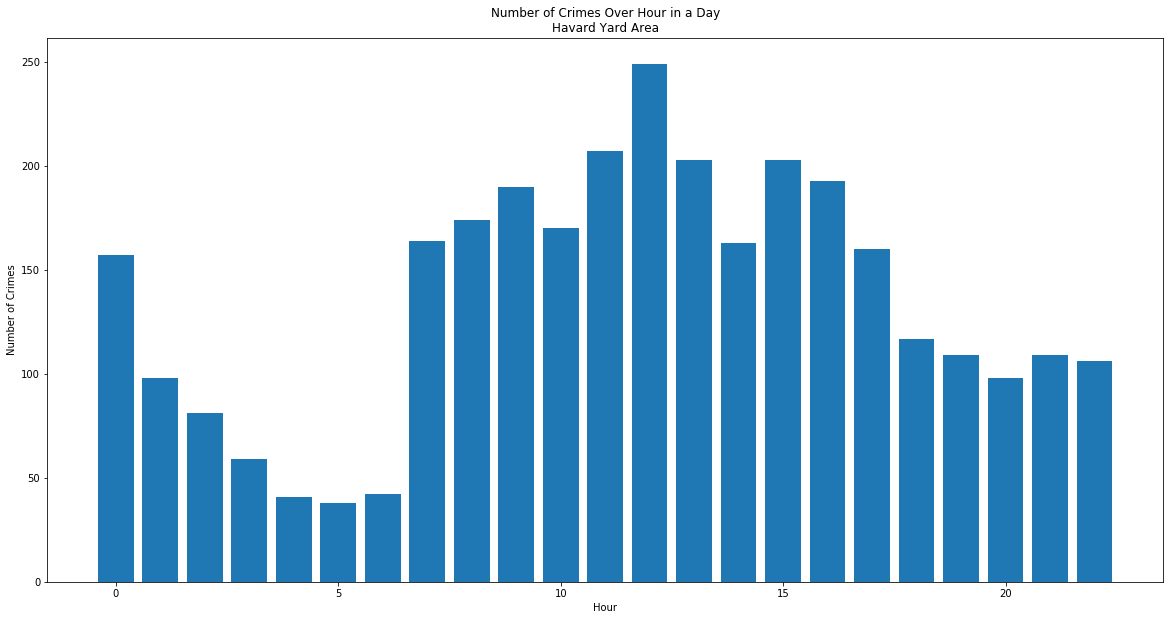

In [58]:
plt.figure(figsize=(20,10))
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Over Hour in a Day\nHavard Yard Area')
plt.bar(list(hours.keys()), hours.values())
plt.show()

Initial Dictionary:


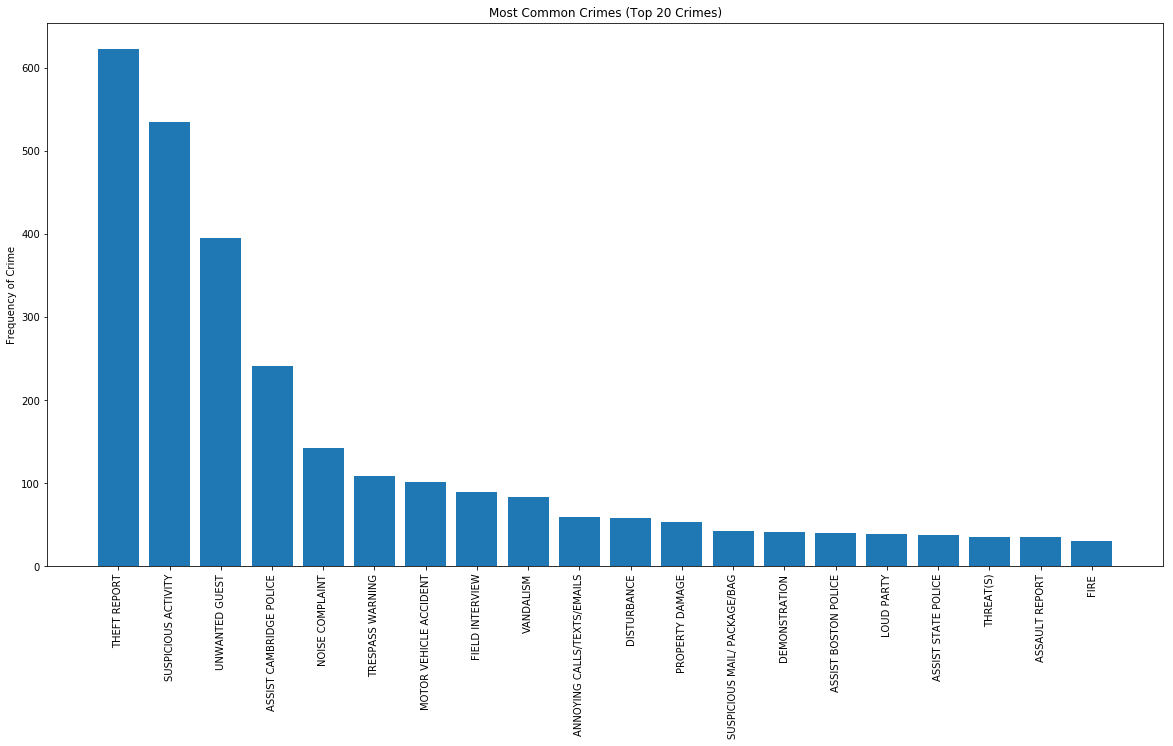

In [57]:
k = Counter(crime_type_dict) 
  
high = k.most_common(20)  
  
print("Initial Dictionary:") 

high.sort(key=lambda x: x[1], reverse=True) 
crimetype = zip(*high)[0]
amount = zip(*high)[1]
x_pos = np.arange(len(crimetype)) 

plt.figure(figsize=(20,10))
plt.title('Most Common Crimes (Top 20 Crimes)')
plt.bar(x_pos, amount, align='center')
plt.xticks(x_pos, crimetype, rotation='vertical') 
plt.ylabel('Frequency of Crime')
plt.show()

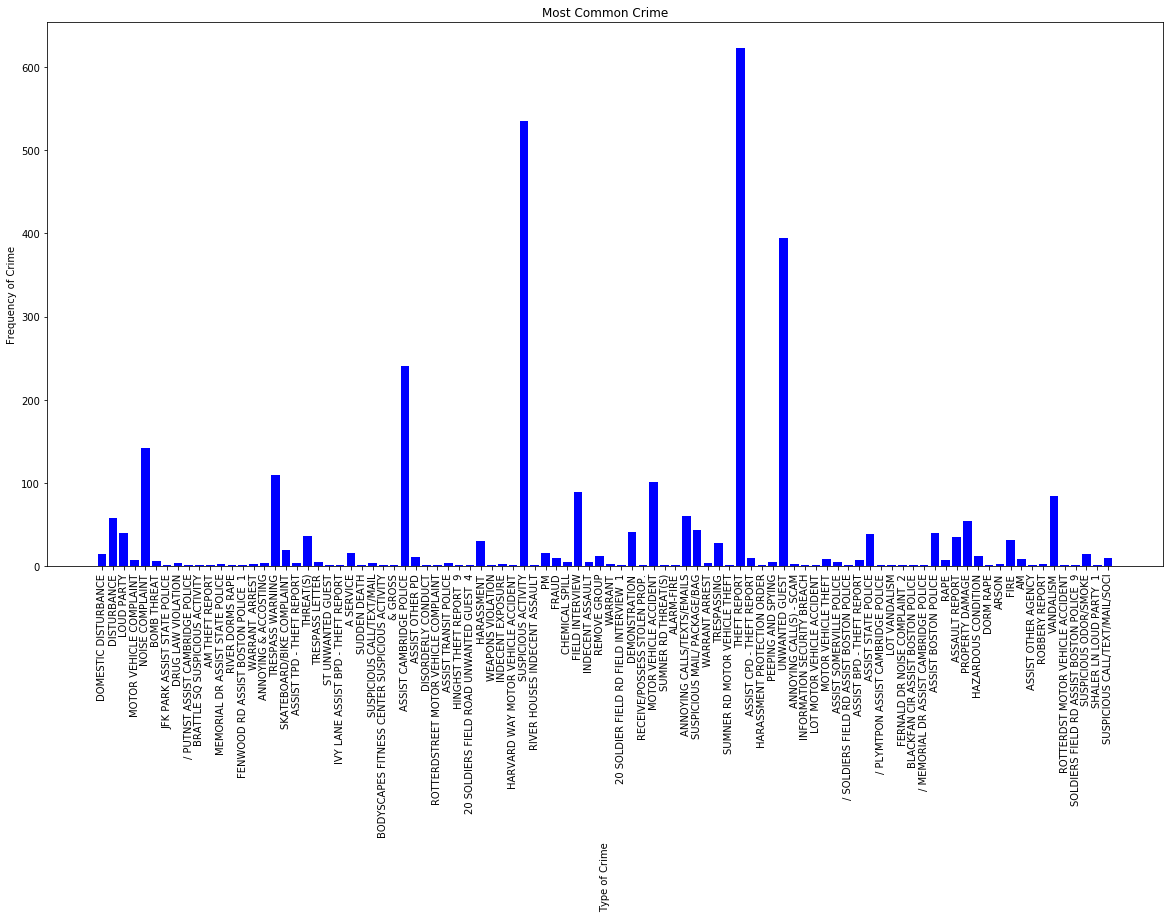

In [60]:
plt.figure(figsize=(20,10))
plt.xlabel('Type of Crime', rotation='vertical')
plt.xticks(rotation='vertical') 
plt.ylabel('Frequency of Crime')
plt.title('Most Common Crime')
plt.bar(list(crime_type_dict.keys()), crime_type_dict.values(), color='b')
plt.show()